## Boston Housing Using Regression

The goal of this project is to predict Boston Housing cost using Supervised Learning Model such as Linear Regression, Decision Tree and Random Forest models and compared the Root Mean Square Error (RMSE) to see which model gives the best prediction.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

In [15]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [16]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
boston['MEDV'] = boston_dataset.target
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [19]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [20]:
#data Cleaning

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

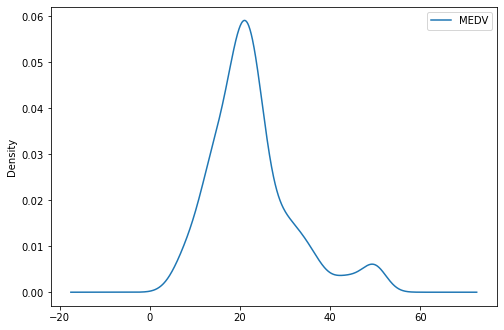

In [21]:
#normal distribution curve 
boston['MEDV'].plot.kde(figsize=(8,5.5), label='MEDV', legend=True)

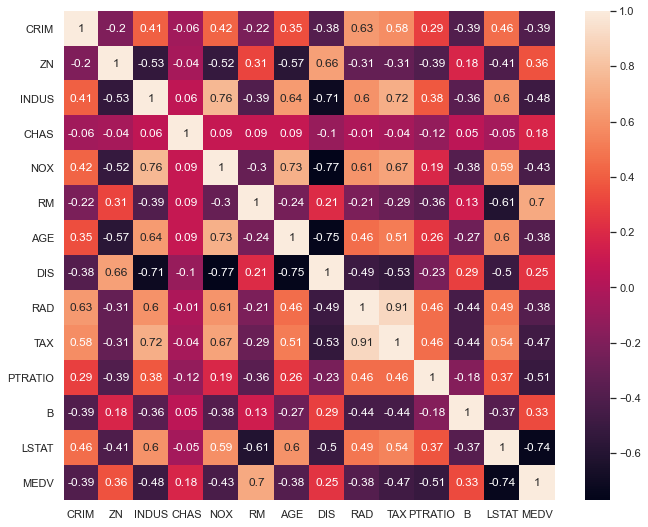

In [24]:
#build correlation using heatmap
sns.set(rc={'figure.figsize':(11, 9)})

correlation_matrix = boston.corr().round(2)
sns.heatmap(correlation_matrix, annot=True)


#### Observation

* By looking at the correlation matrix, RM has a strong correlation with target variable, MEDV (0.7) where as LSTAT has -0.74
* (RAD and TAX) and DIS and AGE have multicolinearity, we will exclude them from the model

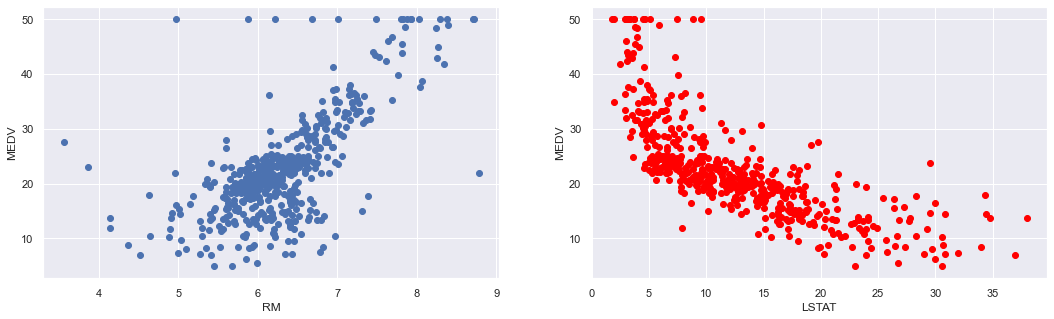

In [32]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(boston['RM'], boston['MEDV'])
ax1.set_xlabel('RM')
ax1.set_ylabel('MEDV')
ax2 =plt.subplot(1,2,2)
ax2.scatter(boston['LSTAT'], boston['MEDV'], color='red')
ax2.set_xlabel('LSTAT')
ax2.set_ylabel('MEDV')
plt.show()

In [33]:
X= boston[['LSTAT', 'RM']]
Y = boston['MEDV']

In [36]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [41]:

lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, predictions)))
#r2 = r2_score(y_train, predictions)
rmse


5.6371293350711955

In [58]:
X1 = boston.drop(columns=['MEDV', 'RAD'], axis=1)
Y1 = boston['MEDV']

In [62]:
#using cross validation
from sklearn.model_selection import cross_val_score

def train(model, X1, Y1):
    
    x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    #perform cross-validation
    cv_score = cross_val_score(model, X1, Y1, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print('Model Reprot')
    print('MSE:', mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

Model Reprot
MSE: 26.470945619590694
CV Score: 35.58136621076921


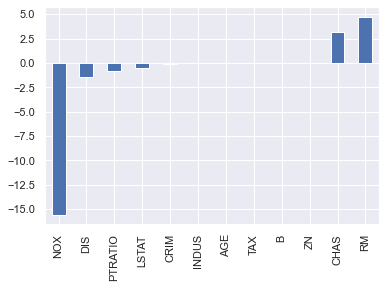

In [63]:
model = LinearRegression(normalize=True)
train(model, X1, Y1)

coef= pd.Series(model.coef_, X1.columns).sort_values()
coef.plot(kind='bar')



Model Reprot
MSE: 21.585588235294118
CV Score: 44.08698155697922


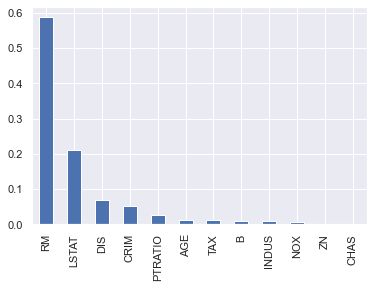

In [64]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X1, Y1)
coef = pd.Series(model.feature_importances_, X1.columns).sort_values(ascending=False)
coef.plot(kind='bar')

Model Reprot
MSE: 9.69197020588235
CV Score: 22.047230410677525


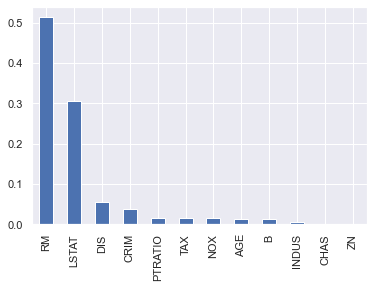

In [65]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X1, Y1)
coef = pd.Series(model.feature_importances_, X1.columns).sort_values(ascending=False)
coef.plot(kind='bar')

Out of Linear Regression, Decision Tree, and Random Forest, it appears Random Forest method is the favorable model to use for this dataset as it has the least MSE and CV score compared to other models.